In [3]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(train_images,train_labels),(test_images,test_labels)=tf.keras.datasets.mnist.load_data()
train_images=train_images.reshape((60000,28*28))/255.0
test_images=test_images.reshape((10000,28*28))/255.0

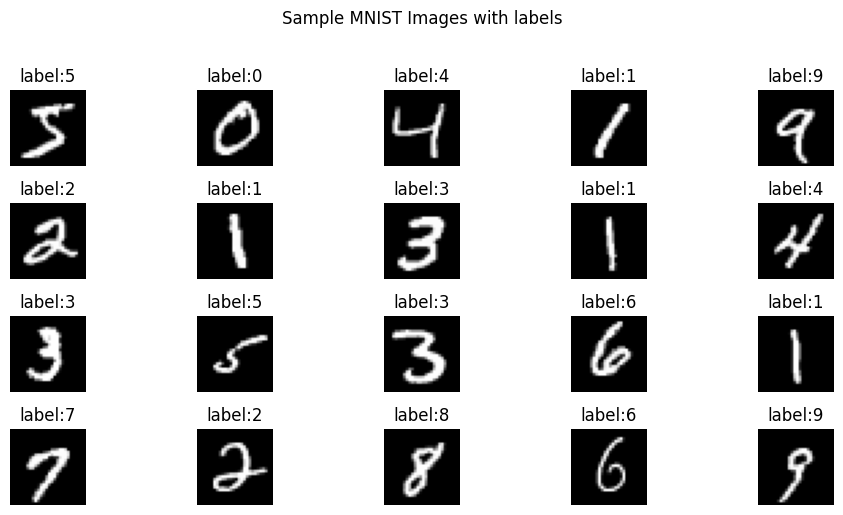

In [5]:
plt.figure(figsize=(10,5))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(train_images[i].reshape(28,28),cmap='gray')
    plt.title(f"label:{train_labels[i]}")
    plt.axis('off')
plt.suptitle('Sample MNIST Images with labels',y=1.02)
plt.tight_layout()
plt.show()

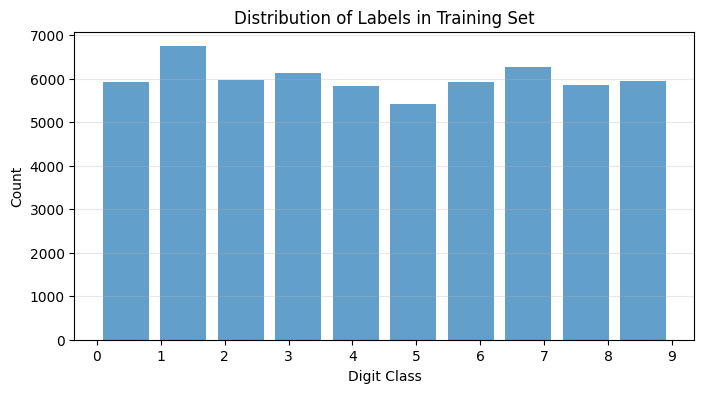

In [6]:
plt.figure(figsize=(8, 4))
plt.hist(train_labels, bins=10, rwidth=0.8, alpha=0.7)
plt.xticks(range(10))
plt.title('Distribution of Labels in Training Set')
plt.xlabel('Digit Class')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
plt.show()

In [102]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))  # first hidden layer
model.add(Dropout(0.2))  # optional: helps prevent overfitting
model.add(Dense(128, activation='relu'))  # second hidden layer
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [103]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [121]:
history=model.fit(train_images,train_labels,epochs=20,batch_size=128,validation_data=(test_images,test_labels))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9980 - loss: 0.0070 - val_accuracy: 0.9852 - val_loss: 0.1090
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9981 - loss: 0.0069 - val_accuracy: 0.9857 - val_loss: 0.1171
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9982 - loss: 0.0055 - val_accuracy: 0.9839 - val_loss: 0.1188
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9980 - loss: 0.0067 - val_accuracy: 0.9820 - val_loss: 0.1287
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9979 - loss: 0.0098 - val_accuracy: 0.9830 - val_loss: 0.1233
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9980 - loss: 0.0076 - val_accuracy: 0.9836 - val_loss: 0.1182
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9975 - loss: 0.0091 - val_accuracy: 0.9844 - val_loss: 0.1224
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9981 - loss: 0.0058 - val_accuracy: 0.

In [122]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9819 - loss: 0.1728

Test accuracy: 0.9853


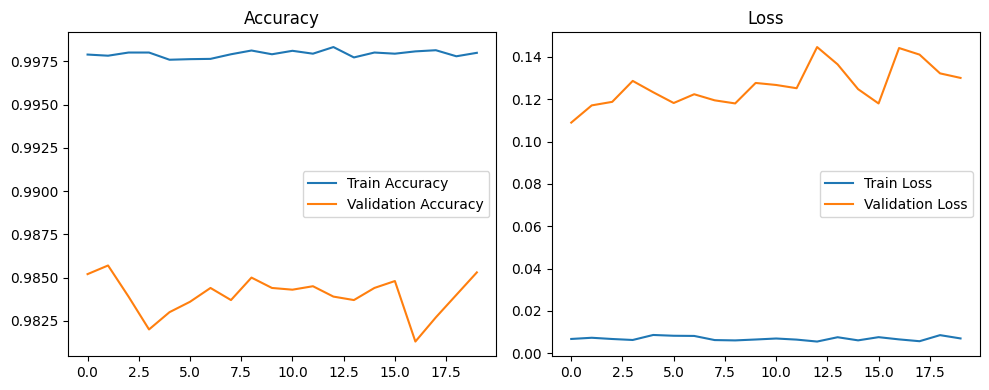

In [123]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


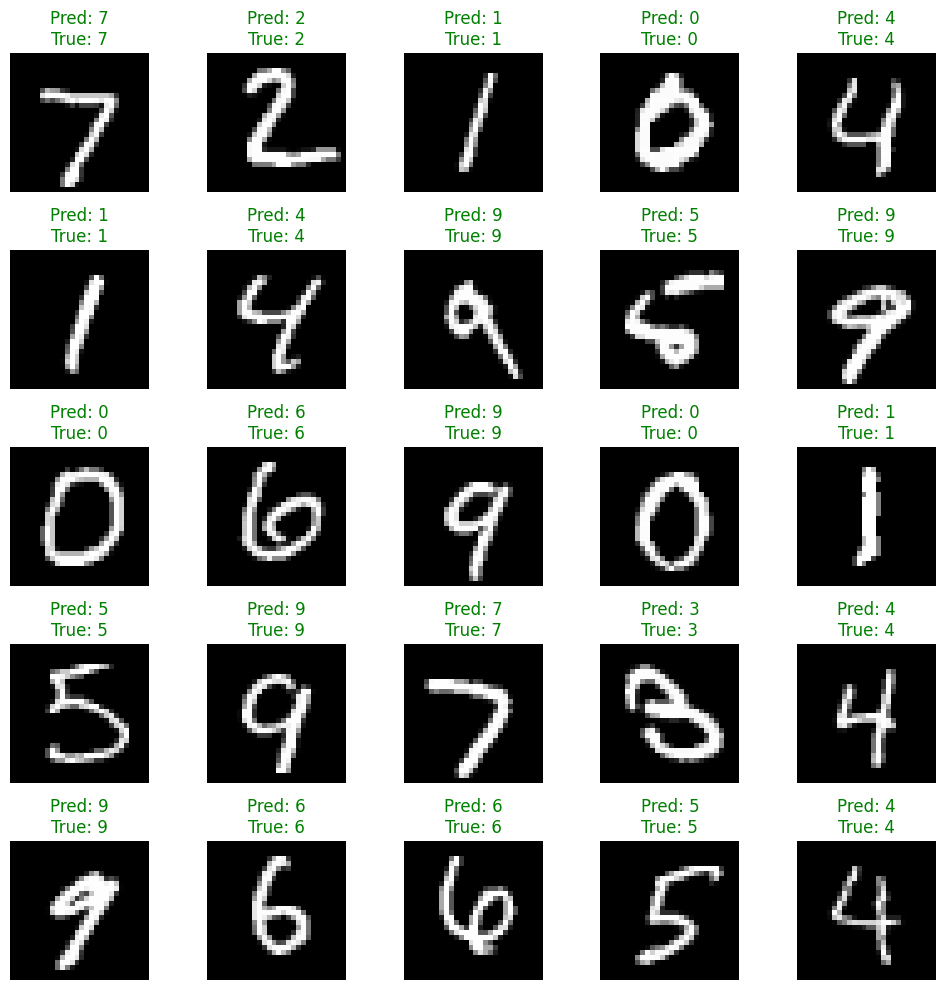

In [124]:
predictions = model.predict(test_images)
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    pred_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    color = 'green' if pred_label == true_label else 'red'
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()